# 1. Import Libraries 

In [2]:
from owl2vec_star import owl2vec_star

import sys
sys.path.append("../")

from rdflib import Graph
from rdflib import URIRef, BNode, Literal
from rdflib import Namespace
from rdflib.namespace import OWL, RDF, RDFS, FOAF, XSD
from rdflib.util import guess_format

import pandas as pd
import numpy as np

import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt

#Kmeans
from sklearn.cluster import KMeans

#T-SNE
from sklearn.manifold import MDS, TSNE


# 1. Train OWL2Vec

In [3]:
#OWL2Vec* Code downloaded from - https://github.com/KRR-Oxford/OWL2Vec-Star
#Code to run model used from SWTKG Lab 9 - Ernesto Jimenez Ruiz
gensim_model = owl2vec_star.extract_owl2vec_model("./dissertation/AWA2_KG01_basic_attributes_03.owl", "./KG03_AwA2.cfg", True, True, False)

output_folder="./cache/output/"

#Gensim format
gensim_model.save(output_folder+"AwA2_option03.embeddings", )
#Txt format
gensim_model.wv.save_word2vec_format(output_folder+"AwA2_option03.embeddings.txt", binary=False)


INFO: Access the ontology ...
INFO: There are 1735 triples in the ontology
INFO: Extract classes and individuals ...
INFO: Extract axioms ...
INFO: Extract annotations ...
INFO: Generate URI document ...
INFO: Extracted 0 walks for 0 seed entities
INFO: Extracted 1573 axiom sentences
INFO: Generate literal document ...
INFO: Extracted 0 annotation sentences
INFO: URI_Doc: 1573, Lit_Doc: 1573, Mix_Doc: 0
INFO: Time for document construction: 2.269890785217285 seconds
INFO: Train the language model ...
INFO: collecting all words and their counts
INFO: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO: collected 283 word types from a corpus of 11527 raw words and 3146 sentences
INFO: Creating a fresh vocabulary
INFO: Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 255 unique words (90.10600706713781%% of original 283, drops 28)', 'datetime': '2022-12-21T02:10:02.546400', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 

INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; 

INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 10 : training on 11527 raw words (6645 effective words) took 0.0s, 392552 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 m

INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 16 : training on 11527 raw words (6666 effective words) took 0.0s, 468658 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 m

INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 22 : training on 11527 raw words (6707 effective words) took 0.0s, 420314 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 mo

INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 28 : training on 11527 raw words (6659 effective words) took 0.0s, 413510 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more

INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 34 : training on 11527 raw words (6648 effective words) took 0.0s, 405035 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more t

INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 40 : training on 11527 raw words (6676 effective words) took 0.0s, 581432 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more th

INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 46 : training on 11527 raw words (6707 effective words) took 0.0s, 412302 effective words/s
INFO: worker thread finished; awaiting finish of 19 more th

INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 52 : training on 1152

INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awa

INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; a

INFO: EPOCH - 69 : training on 11527 raw words (6667 effective words) took 0.0s, 620411 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 m

INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 75 : training on 11527 raw words (6654 effective words) took 0.0s, 511803 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 more threads
INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 m

INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 81 : training on 11527 raw words (6631 effective words) took 0.0s, 462826 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 more threads
INFO: worker thread finished; awaiting finish of 11 more threads
INFO: worker thread finished; awaiting finish of 10 m

INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 87 : training on 11527 raw words (6745 effective words) took 0.0s, 532726 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more threads
INFO: worker thread finished; awaiting finish of 13 more threads
INFO: worker thread finished; awaiting finish of 12 mor

INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 93 : training on 11527 raw words (6706 effective words) took 0.0s, 662943 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more threads
INFO: worker thread finished; awaiting finish of 15 more threads
INFO: worker thread finished; awaiting finish of 14 more 

INFO: worker thread finished; awaiting finish of 9 more threads
INFO: worker thread finished; awaiting finish of 8 more threads
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 99 : training on 11527 raw words (6661 effective words) took 0.0s, 657299 effective words/s
INFO: worker thread finished; awaiting finish of 19 more threads
INFO: worker thread finished; awaiting finish of 18 more threads
INFO: worker thread finished; awaiting finish of 17 more threads
INFO: worker thread finished; awaiting finish of 16 more th

# 3. Loading embeddings and test similarities

In [4]:
from gensim.models import KeyedVectors

#Embedding vectors generated above
model = KeyedVectors.load("./cache/output/AwA2_option03.embeddings", mmap='r')
#Normalise vectors
#model.init_sims(replace=True)
wv = model.wv

"""
vector1 = model.wv.get_vector('rat')
vector2 = wv['mouse']  # Get numpy vector of a word
#print("Vector for 'rat'")
#print(vector1)
#print(vector2)

#cosine similarity
similarity = wv.similarity('hamster', 'lion')
print(similarity)

similarity = wv.similarity('seal', 'grizzly+bear')
print(similarity)

similarity = wv.similarity('giant+panda', 'grizzly+bear')
print(similarity)

similarity = wv.similarity('dalmatian', 'collie')
print(similarity)

similarity = wv.similarity('cow', 'ox')
print(similarity)
"""
#cosine similarity
similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#hamster', 'http://www.semanticweb.org/inm363/AwA2#lion')
print(similarity)

similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#seal', 'http://www.semanticweb.org/inm363/AwA2#grizzly+bear')
print(similarity)

similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#giant+panda', 'http://www.semanticweb.org/inm363/AwA2#grizzly+bear')
print(similarity)

similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#dalmatian', 'http://www.semanticweb.org/inm363/AwA2#collie')
print(similarity)

similarity = wv.similarity('http://www.semanticweb.org/inm363/AwA2#cow', 'http://www.semanticweb.org/inm363/AwA2#ox')
print(similarity)

#Most similar cosine similarity
#result = wv.most_similar(positive=['grizzly+bear'])
#print(result)

#Most similar entities: cosmul
result = wv.most_similar(positive=['http://www.semanticweb.org/inm363/AwA2#ox'])
print(result)

INFO: loading KeyedVectors object from ./cache/output/AwA2_option03.embeddings
INFO: loading wv recursively from ./cache/output/AwA2_option03.embeddings.wv.* with mmap=r
INFO: setting ignored attribute cum_table to None
INFO: Word2Vec lifecycle event {'fname': './cache/output/AwA2_option03.embeddings', 'datetime': '2022-12-21T02:10:04.802213', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'loaded'}


0.8988339
0.8672445
0.9596237
0.98255175
0.99633217
[('http://www.semanticweb.org/inm363/AwA2#cow', 0.9963321089744568), ('http://www.semanticweb.org/inm363/AwA2#pig', 0.9911156296730042), ('http://www.semanticweb.org/inm363/AwA2#elephant', 0.9867870211601257), ('http://www.semanticweb.org/inm363/AwA2#rhinoceros', 0.9861764907836914), ('http://www.semanticweb.org/inm363/AwA2#buffalo', 0.9853568077087402), ('http://www.semanticweb.org/inm363/AwA2#moose', 0.9846416711807251), ('http://www.semanticweb.org/inm363/AwA2#sheep', 0.9839202761650085), ('http://www.semanticweb.org/inm363/AwA2#giraffe', 0.9829798936843872), ('http://www.semanticweb.org/inm363/AwA2#horse', 0.9663738012313843), ('http://www.semanticweb.org/inm363/AwA2#zebra', 0.9649791121482849)]


# 4. Prepare data for T-SNE 

### 4.1 Import Animal Taxonomy

In [5]:
classes_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/classes.txt", sep = '\t',header = None, names = ['labels','classes'])
classes_df.head()

,labels,classes
0,1,antelope
1,2,grizzly+bear
2,3,killer+whale
3,4,beaver
4,5,dalmatian


In [6]:
taxonomy_df = pd.read_csv("C:/Dissertation/Data/Mammal Taxonomy/Mammal Taxonomy_noduplicates.csv")
taxonomy_df.head()

,sciName,animal_label,animal_class,mainCommonName,otherCommonNames,class,infraclass,magnorder,superorder,order,...,infraorder,parvorder,superfamily,family,subfamily,tribe,genus,subgenus,biogeographicRealm,CMW_sciName
0,Antilope_cervicapra,1,antelope,Blackbuck,Indian Antelope,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,PECORA,NaN,NaN,BOVIDAE,ANTILOPINAE,ANTILOPINI,Antilope,NaN,Palearctic,Antilope_cervicapra
1,Ursus_arctos,2,grizzly+bear,Brown Bear,Grizzly Bear|Kodiak Bear,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,ARCTOIDEA,NaN,URSOIDEA,URSIDAE,URSINAE,NaN,Ursus,NaN,Nearctic|Palearctic,Ursus_arctos
2,Orcinus_orca,3,killer+whale,Killer Whale,Orca,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,...,CETACEA,ODONTOCETI,DELPHINOIDEA,DELPHINIDAE,INCERTAE SEDIS,NaN,Orcinus,NaN,Marine,Orcinus_orca
3,Aplodontia_rufa,4,beaver,Mountain Beaver,Boomer|Sewellel|Point Arena Mountain Beaver|Po...,Mammalia,Placentalia,Boreoeutheria,Euarchontoglires,RODENTIA,...,NaN,NaN,NaN,APLODONTIIDAE,NaN,NaN,Aplodontia,NaN,Nearctic,Aplodontia_rufa
4,Canis_familiaris,5,dalmatian,Domestic Dog,Dog|Dingo|Feral Dog|New Guinea Singing Dog|Vil...,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,...,CANOIDEA,NaN,NaN,CANIDAE,NaN,NaN,Canis,NaN,Domesticated,Canis_familiaris


### 4.2 Save KG Vector embeddings for the animal classes as a dictionary tuple

In [7]:
class_kg_embeddings = {}
for classes in classes_df['classes']:
    print('http://www.semanticweb.org/inm363/AwA2#' + classes)
    print(wv['http://www.semanticweb.org/inm363/AwA2#' + classes])
    class_kg_embeddings.update({classes: wv['http://www.semanticweb.org/inm363/AwA2#' + classes]})    

http://www.semanticweb.org/inm363/AwA2#antelope
[ 5.52197061e-02  1.48207381e-01  2.10411862e-01 -8.64101201e-02
  1.17067974e-02  1.97268993e-01  1.77172303e-01 -3.51926275e-02
  1.51331812e-01  2.71256007e-02 -2.55194353e-03  4.47575524e-02
  2.48394366e-02 -3.40440832e-02  1.35405352e-02  9.03613940e-02
  2.41834503e-02  6.04596436e-02 -8.93297885e-03  1.66790523e-02
  2.14525219e-03  7.39692971e-02  6.80108517e-02  2.36189999e-02
 -1.40456721e-01 -2.01833636e-01 -1.94545183e-02 -1.57555848e-01
  1.24800242e-01  4.09376211e-02  2.03118771e-01 -4.51645851e-02
 -8.52851011e-03  2.11734429e-01 -1.21499114e-01  6.71323985e-02
 -1.15395971e-01  1.16853617e-01 -1.44613814e-03 -1.26326948e-01
 -9.72665548e-02  2.44224757e-01 -1.59006819e-01  2.00905055e-01
 -3.02931424e-02  4.07246426e-02  1.73292346e-02 -3.91988792e-02
 -1.36263482e-02  1.33689031e-01 -3.45315002e-02 -1.08182669e-01
 -7.79641652e-03 -1.53694376e-01  1.33253947e-01 -1.07986018e-01
 -4.61076349e-02  1.13056913e-01  1.568187

[ 6.08263724e-02  1.48898318e-01  2.17784524e-01 -9.47611555e-02
  1.44714825e-02  1.98146209e-01  1.79236695e-01 -3.19891907e-02
  1.61119521e-01  3.09129935e-02 -4.40866547e-03  4.25150134e-02
  2.35847831e-02 -2.99566090e-02  3.18724103e-02  8.88623744e-02
  2.94380747e-02  6.42783195e-02  3.82871622e-06  2.29625236e-02
  7.41473539e-03  6.93700761e-02  6.45397380e-02  1.98373068e-02
 -1.34093940e-01 -2.11223125e-01 -1.66532025e-02 -1.51367769e-01
  1.31960079e-01  4.35608327e-02  2.02524349e-01 -3.84139903e-02
 -2.11687735e-03  2.12950930e-01 -1.24982089e-01  7.27480054e-02
 -1.13000199e-01  1.11164510e-01 -1.91969494e-03 -1.31246731e-01
 -9.07771885e-02  2.39129692e-01 -1.58014461e-01  1.98123991e-01
 -2.71089096e-02  4.11587097e-02  1.66421626e-02 -4.41513620e-02
 -1.22837909e-02  1.37339398e-01 -4.04533781e-02 -1.12049662e-01
 -3.18266032e-03 -1.51141569e-01  1.31933704e-01 -1.08344011e-01
 -4.30928618e-02  1.01892412e-01  1.39746973e-02 -1.10286713e-01
  8.31579566e-02  4.20587

### 4.3 Make Pandas dataframe from dictionary

In [8]:
KG_embeddiongs_df = pd.DataFrame.from_dict(class_kg_embeddings)
KG_embeddiongs_df = KG_embeddiongs_df.T
KG_embeddiongs_df = KG_embeddiongs_df.reset_index()
KG_embeddiongs_df.to_csv("C:\Dissertation\Data\Processed Data\Custom_Animal_Attribute_KG_continous_vectors.csv")
KG_embeddiongs_df.head()

,index,0,1,2,3,4,5,6,7,8,...,670,671,672,673,674,675,676,677,678,679
0,antelope,0.055220,0.148207,0.210412,-0.086410,0.011707,0.197269,0.177172,-0.035193,0.151332,...,0.068002,-0.000526,-0.212449,-0.010055,0.131040,0.029889,-0.054548,-0.240713,0.099759,0.165695
1,grizzly+bear,0.119048,0.162539,0.194450,-0.235253,0.067931,0.150762,0.176043,-0.024806,0.131360,...,0.061482,0.006009,-0.206499,-0.108688,0.168419,0.042549,0.020893,-0.074808,0.137555,0.169801
2,killer+whale,0.092134,0.237342,0.134712,-0.173984,0.072867,0.180230,0.176698,-0.129347,0.220514,...,0.098140,0.113280,-0.193557,-0.018227,0.238413,0.045156,-0.001645,-0.096474,0.196808,0.128185
3,beaver,0.120916,0.232163,0.145981,-0.273387,0.042770,0.147996,0.162474,-0.045358,0.164169,...,0.045278,0.052890,-0.213797,-0.069310,0.212750,0.089358,0.030496,-0.051866,0.175682,0.163411
4,dalmatian,0.099347,0.165576,0.209352,-0.181253,0.045938,0.199144,0.188889,-0.041212,0.169523,...,0.084561,0.022485,-0.231515,-0.055986,0.172088,0.068303,-0.014511,-0.143246,0.148576,0.168058


# 5. K-means clustering to see assess vector quality

In [9]:
#Seperate columns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
labels = KG_embeddiongs_df['index']
#continous_attributes = StandardScaler().fit_transform(KG_embeddiongs_df.iloc[:,1:680])


C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

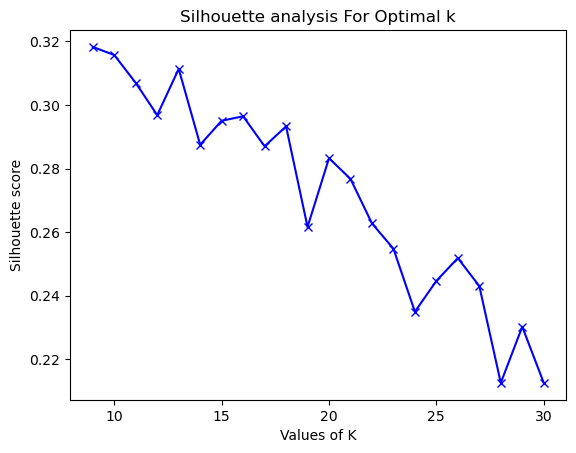

In [10]:
from sklearn.metrics import silhouette_score
range_n_clusters = [9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(KG_embeddiongs_df.iloc[:,1:])
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(KG_embeddiongs_df.iloc[:,1:], cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=14, random_state=0)
kmeans.fit(KG_embeddiongs_df.iloc[:,1:])
clusters = kmeans.predict(KG_embeddiongs_df.iloc[:,1:])
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 6. Visualising classes 2D space by decomposing the attributes using T-SNE

In [12]:
tsne = TSNE(n_components=2, verbose=0, random_state=100, metric = 'cosine', perplexity=15.0)
#Binary
#tsne_binary = tsne.fit_transform(binary_attributes) 
#tsne_binary_df = pd.DataFrame(data = tsne_binary
             #, columns = ['Binary comp-1', 'Binary comp-2'])

#Continous
tsne_continous= tsne.fit_transform(KG_embeddiongs_df.iloc[:,1:]) 
tsne_continous_df = pd.DataFrame(data = tsne_continous
             , columns = ['Continous comp-1', 'Continous comp-2'])

#concat
#tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
#tsne_binary_df1 = pd.concat([tsne_binary_df1, animal_type], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df, labels], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['order']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['family']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, clusters_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [13]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='index:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

INFO: Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


alt.LayerChart(...)

In [14]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('family:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='index:N'
)

points.interactive() + text

alt.LayerChart(...)

# 7. Covert to Binary Vectors

In [15]:
b = np.where(KG_embeddiongs_df.iloc[:,1:]>=0, 1, KG_embeddiongs_df.iloc[:,1:])
b = np.where(b<0, 0, b)
binary_attributes_df = pd.DataFrame(data = b)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

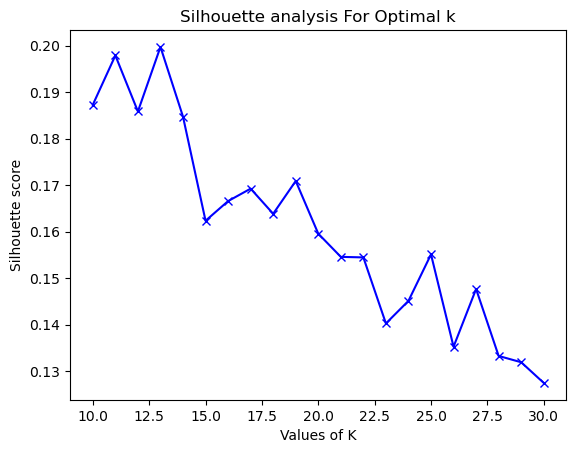

In [16]:
from sklearn.metrics import silhouette_score
range_n_clusters = [10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(binary_attributes_df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(binary_attributes_df, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=18, random_state=0)
kmeans.fit(binary_attributes_df)
clusters = kmeans.predict(binary_attributes_df)
clusters_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
binary_attributes_df = pd.concat([binary_attributes_df, labels], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['order']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, taxonomy_df['family']], axis = 1)
binary_attributes_df = pd.concat([binary_attributes_df, clusters_df['K_mean']], axis = 1)
binary_attributes_df.to_csv("C:\Dissertation\Data\Processed Data\Custom_Animal_Attribute_KG_binary_vectors.csv")
binary_attributes_df.head()

,0,1,2,3,4,5,6,7,8,9,...,674,675,676,677,678,679,index,order,family,K_mean
0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,antelope,ARTIODACTYLA,BOVIDAE,0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,grizzly+bear,CARNIVORA,URSIDAE,17
2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,killer+whale,ARTIODACTYLA,DELPHINIDAE,9
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,beaver,RODENTIA,APLODONTIIDAE,6
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,dalmatian,CARNIVORA,CANIDAE,2


In [19]:
tsne = TSNE(n_components=2, verbose=0, random_state=100, metric = 'cosine', perplexity=15.0)
#binary
tsne_binary= tsne.fit_transform(binary_attributes_df.iloc[:,0:-4]) 
tsne_binary_df = pd.DataFrame(data = tsne_binary
             , columns = ['binarycomp-1', 'binarycomp-2'])

#concat
tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['order']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['family']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, clusters_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [20]:
source = tsne_binary_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='binarycomp-1:Q',
    y='binarycomp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='index:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)